# Comparing a USGSCSM and ISIS camera for Dejittered HiRISE image

In [1]:
import pyproj
import pvl
import numpy as np
import os
import pandas as pd
import json
from IPython.display import Image

os.environ['ISISROOT'] = ""/usgs/pkgs/isis3.7.0/install"

import knoten
from knoten import vis
import csmapi
import ale
from pysis import isis
from pysis.exceptions import ProcessError

import plotly
plotly.offline.init_notebook_mode(connected=True)

/home/kberry/anaconda3/envs/knoten/lib/python3.7/site-packages/ale/__init__.py:22: UserWarning:

ALESPICEROOT environment variable not set, Spice Drivers will not function correctly



## Update the ISIS cube
Requires ESP_016076_2175_REDmos_hijitreged.balance.noproj.8bit.cub in data directory

We also have to set the shapemodel to the ellipsoid because CSM does not natively support DEM intersections

In [2]:
cub_loc = 'data/ESP_016076_2175_REDmos_hijitreged.balance.noproj.8bit.cub'
try:
    isis.editlab(from_=cub_loc, grpname='Kernels', Keyword='ShapeModel', value='Null')
except ProcessError as e:
    print(f'Failed to set shapemodel for {cub_loc} to ellipsoid:\n{e.stderr}')

## Generate a USGSCSM ISD

In [3]:
usgscsm_str = ale.loads(cub_loc, formatter='usgscsm')

csm_isd = os.path.splitext(cub_loc)[0] + '.json'
with open(csm_isd, 'w') as isd_file:
    isd_file.write(usgscsm_str)

## Compare the Exterior Orientations

In [4]:
csmisis_diff_lv_plot, csmisis_diff_ephem_plot, external_orientation_data = vis.external_orientation_diff(csm_isd, cub_loc, 10, 50, 600, 600)

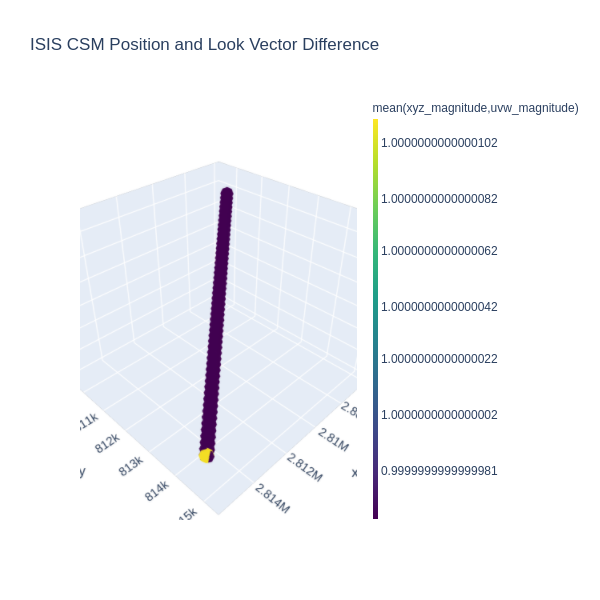

In [5]:
csmisis_diff_lv_plot_bytes = csmisis_diff_lv_plot.to_image(format="png")
Image(csmisis_diff_lv_plot_bytes)

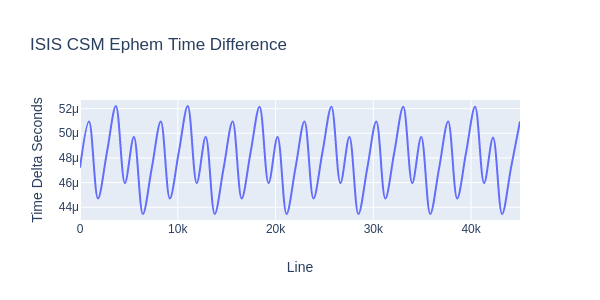

In [6]:
csmisis_diff_ephem_plot_bytes = csmisis_diff_ephem_plot.to_image(format="png")
Image(csmisis_diff_ephem_plot_bytes)

In [7]:
external_orientation_data[['diffx', 'diffy', 'diffz', 'diffu', 'diffv', 'diffw']].describe()

,diffx,diffy,diffz,diffu,diffv,diffw
count,500.000000,500.000000,500.000000,5.000000e+02,5.000000e+02,5.000000e+02
mean,-0.087484,-0.045037,0.127948,2.333367e-08,1.277602e-08,-3.375076e-08
std,0.000149,0.000031,0.000131,4.724161e-11,2.386571e-10,9.950145e-11
min,-0.087742,-0.045103,0.127702,2.322389e-08,1.234952e-08,-3.396734e-08
25%,-0.087614,-0.045060,0.127845,2.330008e-08,1.256359e-08,-3.382785e-08
50%,-0.087484,-0.045039,0.127947,2.333338e-08,1.277933e-08,-3.375161e-08
75%,-0.087349,-0.045015,0.128047,2.336772e-08,1.298689e-08,-3.367324e-08
max,-0.087217,-0.044968,0.128185,2.344664e-08,1.320395e-08,-3.352655e-08


## Compare the Ground Intersections and Back Projections

In [8]:
isis2csm_plot, csm2isis_plot, isiscsm_plotlatlon, isiscsm_plotbf, isis2csm_data, csm2isis_data, isiscsm_latlondata, isiscsm_bfdata = vis.reprojection_diff(csm_isd, cub_loc, 10, 50, 500, 500)

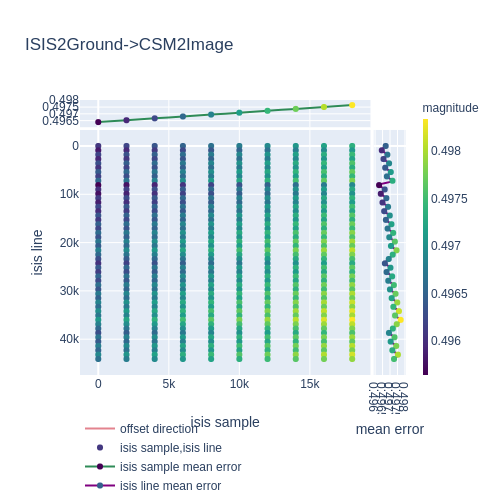

In [9]:
Image(isis2csm_plot.to_image())

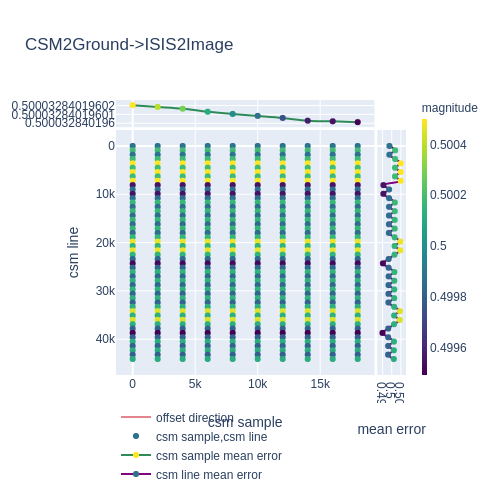

In [10]:
Image(csm2isis_plot.to_image())

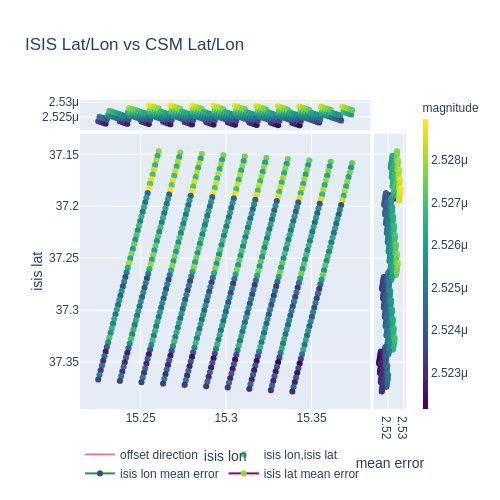

In [11]:
Image(isiscsm_plotlatlon.to_image())

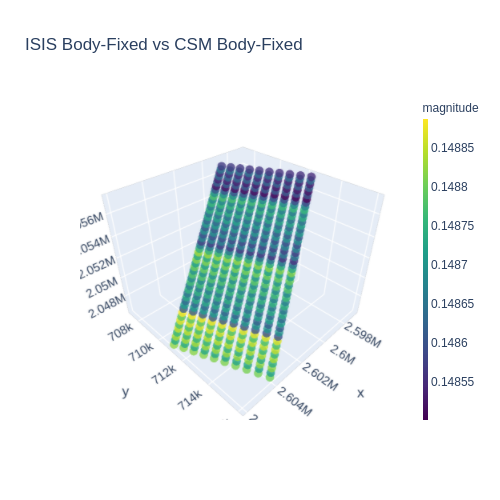

In [12]:
Image(isiscsm_plotbf.to_image())

In [13]:
isis2csm_data.describe()

,csm sample,csm line,isis sample,isis line,diff sample,diff line,magnitude,angles
count,500.000000,500.000000,500.00000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,9000.000063,22049.502985,9000.00000,22050.000000,-0.000063,0.497015,0.497015,1.570923
std,5750.315853,13000.789789,5750.31584,13000.790018,0.000212,0.000518,0.000518,0.000428
min,-0.000316,-0.497341,0.00000,0.000000,-0.000443,0.495641,0.495641,1.570160
25%,4000.000056,10799.503279,4000.00000,10800.000000,-0.000246,0.496642,0.496642,1.570554
50%,9000.000064,22049.502690,9000.00000,22050.000000,-0.000063,0.497010,0.497010,1.570923
75%,14000.000070,33299.502743,14000.00000,33300.000000,0.000121,0.497390,0.497390,1.571292
max,18000.000443,44099.503357,18000.00000,44100.000000,0.000316,0.498337,0.498337,1.571688


In [14]:
csm2isis_data.describe()

,csm sample,csm line,isis sample,isis line,diff sample,diff line,magnitude,angles
count,500.00000,500.000000,500.000000,500.000000,5.000000e+02,500.000000,500.000000,500.000000
mean,9000.00000,22050.000000,9000.000000,22050.500033,3.888381e-08,-0.500033,0.500033,-1.570796
std,5750.31584,13000.790018,5750.315840,13000.789982,1.282757e-06,0.000262,0.000262,0.000003
min,0.00000,0.000000,-0.000002,0.499874,-2.263661e-06,-0.500499,0.499494,-1.570801
25%,4000.00000,10800.000000,4000.000000,10800.499856,-9.830001e-07,-0.500167,0.499832,-1.570798
50%,9000.00000,22050.000000,9000.000000,22050.500311,5.840002e-08,-0.500125,0.500125,-1.570796
75%,14000.00000,33300.000000,14000.000000,33300.500134,1.009250e-06,-0.499832,0.500167,-1.570794
max,18000.00000,44100.000000,18000.000002,44100.500116,2.294800e-06,-0.499494,0.500499,-1.570792
